# Part I

## Converting data to NWB

This is part 3 of the DANDI User Training on Nov 1, 2021.

## Neurodata Without Borders (NWB)
DANDI has chosen NWB as our supported format for exchanging neurophysiology data. NWB is a BRAIN Initiative-backed data standard designed to package all of the data and metadata associated with neurophysiology experiments into a single file that enables sharing and re-analysis of the data. This includes extracellular and intracellular electrophysiology, optical physiology, and behavior. NWB defines a data organization schema that ensure the crucial metadata is packaged in a standardized way. This includes not just the neurophysiology recordings, but also metadata about the subjects, equipment, task structure, etc.


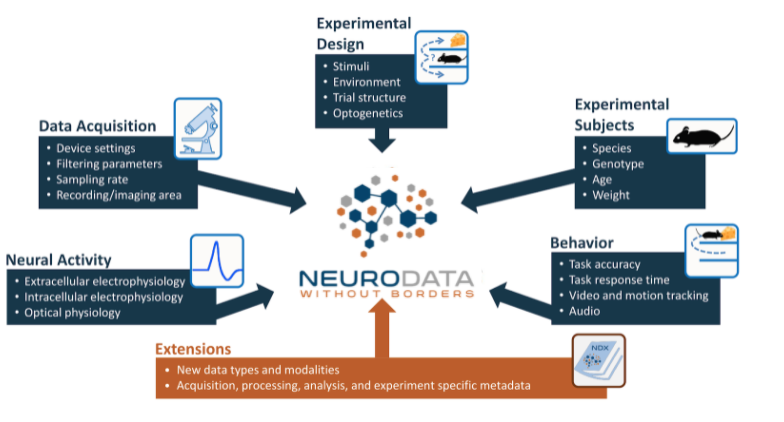

### Creating an NWB file
Converting data to NWB is a big topic that merits its own workshop! Here, we will just give a surface introduction by quickly walk through a script for creating an NWB file. The following creates an example extracellular electrophysiology file with an electrodes table and data from voltage traces. Note also the subject-specific information, which is required by DANDI, and is read and used throughout the data publication process.

In [ ]:
from datetime import datetime
from dateutil.tz import tzlocal
import uuid

import numpy as np

from pynwb.file import NWBFile, Subject
from pynwb.ecephys import ElectricalSeries
from pynwb import NWBHDF5IO

def create_nwbfile(subject_id):
    nwbfile = NWBFile(
        session_description='my first synthetic recording',
        identifier=str(uuid.uuid4()),
        session_start_time=datetime.now(tzlocal()),
        experimenter='Dr. Bilbo Baggins',
        lab='Bag End Laboratory',
        institution='University of Middle Earth at the Shire',
        experiment_description='I went on an adventure with thirteen dwarves to reclaim vast treasures.',
        session_id='001',
    )

    nwbfile.subject = Subject(
        subject_id=subject_id,
        species='Mus musculus',
        age='P90D',
        sex='F',
    )

    device = nwbfile.create_device(name='trodes_rig123')

    electrode_group = nwbfile.create_electrode_group(
        name='tetrode1',
        description="an example tetrode",
        location="hippocampus",
        device=device,
    )

    for _ in range(4):
        nwbfile.add_electrode(
            x=1.0, y=2.0, z=3.0,
            imp=np.nan,
            location='CA1',
            filtering='none',
            group=electrode_group,
        )

    electrode_table_region = nwbfile.create_electrode_table_region([0, 2], 'the first and third electrodes')


    rate = 10.0
    data_len = 1000
    ephys_data = np.random.rand(data_len * 2).reshape((data_len, 2))
    ephys_timestamps = np.arange(data_len) / rate

    ephys_ts = ElectricalSeries(
        name='test_ephys_data',
        data=ephys_data,
        electrodes=electrode_table_region,
        timestamps=ephys_timestamps,
        description="Random numbers generated with numpy.random.rand"
    )
    nwbfile.add_acquisition(ephys_ts)
    
    return nwbfile
    


## NWB tutorials

|   | PyNWB | MatNWB |
|---|---|---|
| Reading NWB files | [Jupyter notebook](https://github.com/NeurodataWithoutBorders/nwb_tutorial/blob/master/HCK09/pynwb_read_demo.ipynb) | [15 min video](https://www.youtube.com/watch?v=ig_Xv2bTxjs&ab_channel=NeurodataWithoutBorders)<br>[MATLAB Live Script](https://github.com/NeurodataWithoutBorders/nwb_tutorial/blob/master/HCK09/matnwb_read_demo.mlx?raw=true) |
| Writing extracellular electrophysiology | [23 min video](https://www.youtube.com/watch?v=rlywed3ar-s&ab_channel=NeurodataWithoutBorders)<br>[Jupyter notebook](https://github.com/NeurodataWithoutBorders/nwb_tutorial/blob/master/HCK08/ecephys_tutorial.ipynb) | [46 min video](https://www.youtube.com/watch?v=W8t4_quIl1k&ab_channel=NeurodataWithoutBorders)<br>[Written tutorial](https://neurodatawithoutborders.github.io/matnwb/tutorials/html/ecephys.html) |
| Writing intracellular electrophysiology | [Jupyter notebook](https://neurodatawithoutborders.github.io/matnwb/tutorials/html/ecephys.html) | [Written tutorial](https://neurodatawithoutborders.github.io/matnwb/tutorials/html/icephys.html) |
| Writing optical physiology | [31 min video](https://www.youtube.com/watch?v=HPjSxBjdFpM&ab_channel=NeurodataWithoutBorders)<br>[Jupyter notebook](https://github.com/NeurodataWithoutBorders/nwb_tutorial/blob/master/HCK08/ophys_tutorial.ipynb) | [39 min video](https://www.youtube.com/watch?v=OBidHdocnTc&ab_channel=NeurodataWithoutBorders)<br>[Written tutorial](https://neurodatawithoutborders.github.io/matnwb/tutorials/html/ophys.html) |
| Advanced write | [26 min video](https://www.youtube.com/watch?v=wduZHfNOaNg&ab_channel=NeurodataWithoutBorders) | [16 min video](https://www.youtube.com/watch?v=PIE_F4iVv98&ab_channel=NeurodataWithoutBorders)<br>[Written tutorial](https://neurodatawithoutborders.github.io/matnwb/tutorials/html/dataPipe.html) |

If you think NWB might not meet your needs, please contact us on our [help desk](https://github.com/dandi/helpdesk/discussions)!

In [ ]:
!pwd

In [ ]:
from os import mkdir

mkdir('../data')

nwbfile = create_nwbfile(subject_id='001')

with NWBHDF5IO('../data/ecephys_example.nwb', 'w') as io:
    io.write(nwbfile)

# Uploading to DANDI

When you register a dandiset, it creates a permanent ID. For instructional purposes, we will be using a staging version of DANDI, so that we do not create real IDs for pretend datasets.

We are going to use a staging version of DANDI. 

1. Go to DANDI staging (https://gui-staging.dandiarchive.org/) and use your GitHub account to log in.

1. Click on your initials in the upper right and copy your API key.

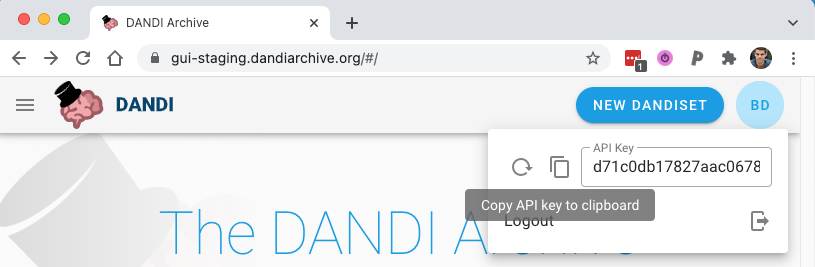

1. Now create a new dataset by clicking the NEW DATASET button

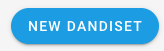

4. Create a new Launcher

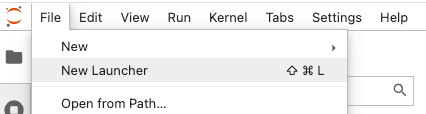 

and launch a Terminal window.

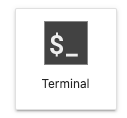

5. Assign your DANDI API key as an environmental variable:

```bash
export DANDI_API_KEY=your-key-here
```

should look like
```bash
export DANDI_API_KEY=d71c0db17827aac067896f612f48af667890000
```

Confirm that this worked with the following line, which should print your key.

```bash
echo $DANDI_API_KEY
```

6. Copy the URL from the dataset you have created (something like `https://gui-staging.dandiarchive.org/#/dandiset/100507`)

and in the Terminal window, run

```bash
dandi download "https://gui-staging.dandiarchive.org/#/dandiset/100507"  # <-- your dandiset ID here
cd 100507 # <-- your dandiset ID here
dandi organize ../data -f dry
dandi organize ../data
dandi upload -i dandi-staging  # (on the non-staging server, this line would simply be: dandi upload)
```

7. Now refresh the landing page of your dandiset and you should see that it is no longer empty.

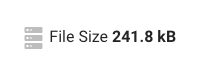

You can explore all the NWB files within by clicking Files

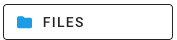

8. Adding more data to a dandiset

In [ ]:
nwbfile = create_nwbfile(subject_id='002')

with NWBHDF5IO('../data/ecephys_example2.nwb', 'w') as io:
    io.write(nwbfile)

Then go back to terminal and run

```bash
dandi organize ../data
dandi upload -i dandi-staging
```

## Visualization NWB files

NWB Widgets is a library of interactive data visualizations that works automatically with any NWB file. This can be very useful for visually confirming any conversion.

In [ ]:
from nwbwidgets import nwb2widget

nwb2widget(nwbfile)

It can also be used to explore any file shared on DANDI. You can use the DANDI API to access the s3 path of any file and stream it directly into NWB Widgets.

In [ ]:
# calcium imaging, Giocomo Lab (30 GB)
#dandiset_id, filepath = "000054", "sub-F2/sub-F2_ses-20190407T210000_behavior+ophys.nwb"

# neuropixel, Giocomo Lab (46 GB)
#dandiset_id, filepath = "000053", "sub-npI1/sub-npI1_ses-20190415_behavior+ecephys.nwb"

# neuropixel, Allen Intitute
#dandiset_id, filepath = "000022", "sub-744912845/sub-744912845_ses-766640955.nwb"

# ecephys, Buzsaki Lab (15.2 GB)
#dandiset_id, filepath = "000003", "sub-YutaMouse41/sub-YutaMouse41_ses-YutaMouse41-150831_behavior+ecephys.nwb"

In [ ]:
from dandi.dandiapi import DandiAPIClient
from pynwb import NWBHDF5IO
from nwbwidgets import nwb2widget

with DandiAPIClient() as client:
    asset = client.get_dandiset(dandiset_id, "draft").get_asset_by_path(filepath)
    s3_url = asset.get_content_url(follow_redirects=1, strip_query=True)

io = NWBHDF5IO(s3_url, mode='r', load_namespaces=True, driver='ros3')
nwb = io.read()
nwb2widget(nwb)